In [1]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt

In [2]:
# select assets for the portfolio
stocks = ['BND','FXE','VOX','VNQ','VWO']

In [3]:
# get adjusted closing prices for the assets from yahoo finance
data = web.get_data_yahoo(stocks,start='01/01/2015',end='31/12/2019',interval='m')['Adj Close']
data.head()

Symbols,BND,FXE,VOX,VNQ,VWO
Date,,,,,
2015-01-01,71.766930,111.220001,71.907372,67.315704,33.977837
2015-02-01,70.686409,110.120003,76.666000,64.842422,35.560181
2015-03-01,71.076416,105.709999,74.797150,65.573509,34.769001
2015-04-01,70.822350,110.370003,77.557175,62.108086,37.411480
2015-05-01,70.496887,107.910004,76.138229,61.920315,36.082050


In [4]:
# calculate monthly returns from adjusted closing prices
returns = data.pct_change()
returns.head()

Symbols,BND,FXE,VOX,VNQ,VWO
Date,,,,,
2015-01-01,NaN,NaN,NaN,NaN,NaN
2015-02-01,-0.015056,-0.009890,0.066177,-0.036742,0.046570
2015-03-01,0.005517,-0.040047,-0.024377,0.011275,-0.022249
2015-04-01,-0.003575,0.044083,0.036900,-0.052848,0.076001
2015-05-01,-0.004595,-0.022289,-0.018295,-0.003023,-0.035535


In [5]:
# calculate mean and standard deviation for monthly returns
mean_return = returns.mean()
stdev_return = returns.std()

In [6]:
# calculate annualised mean and standard deviation
annualised_return = round(mean_return * 12,3)
annualised_stdev = round(stdev_return * np.sqrt(12),3)

In [7]:
# set number of iterations for hypothetical portfolios
num_portfolios = 1000000
num_assets = len(stocks)

In [8]:
# create empty lists to store returns, volatility, and weights of hypothetical portfolios
port_returns = []
port_volatility = []
stock_weights = []

In [9]:
# calculate annualised covariance matrix
cov_matrix = returns.cov()
annualised_cov = cov_matrix * 12

In [10]:
# populate the empty lists with each portfolios returns, volatility, and weights
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, annualised_return)
    volatility = np.sqrt(np.dot(weights.T, np.dot(annualised_cov, weights)))
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

In [11]:
# create dictionary for returns and volatility of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility}

In [12]:
# extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(stocks):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

In [13]:
# create dataframe for dictionary and get labels for columns
df = pd.DataFrame(portfolio)
column_order = ['Returns', 'Volatility'] + [stock+' Weight' for stock in stocks]
df = df[column_order]

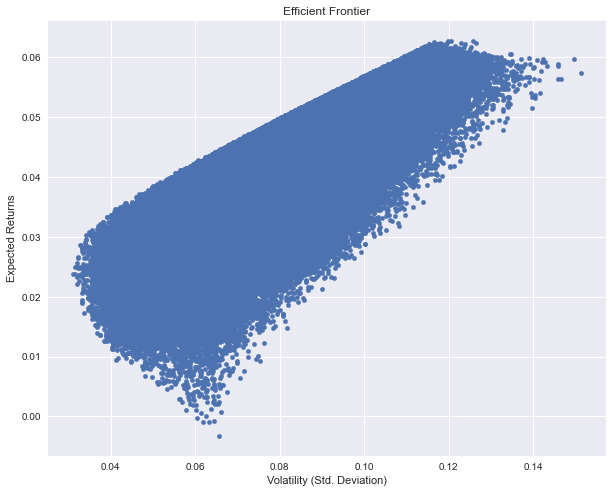

In [14]:
# plot efficient frontier    
plt.style.use('seaborn')
df.plot.scatter(x='Volatility', y='Returns', figsize=(10, 8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()